## November 27, 2019 - Pure Random Search and (1+1)EA on ONEMAX
The Pure Random Search (PRS) and the (1+1)EA are some of the simplest randomized search heuristics which are simple enough to understand their behaviour theoretically on simple functions. In this exercise, we investigate their ability to optimize the ONEMAX function---both experimentally and theoretically.

In [1]:
from __future__ import division, print_function
import numpy as np

In [2]:
def onemax(x):
    return sum(x)

In [3]:
def pureRS(n):
    '''
       Returns the number of function evaluations
       until the optimal function value of the ONEMAX
       function with n bits is reached by a pure 
       random search (PRS). In addition, it returns
       a vector `fitness` of all bestsofar function values.
    '''
    x = np.random.randint(0,2,n) # n random values in {0,1}
    fx = onemax(x)
    fevals = 1 # counter of function evaluations
    fitness = [fx] # store all best-so-far function values
    
    while fx < n:
        y = np.random.randint(0,2,n) # n random values in {0,1}
        fy = onemax(y)
        fevals = fevals + 1
        if fy >= fx:
            x = y
            fx = fy

        fitness.append(fx)
        
    return (fevals, fitness)
            

In [4]:
n = 16
(firstRuntimePRS, firstFitnessPRS) = pureRS(n)
(secondRuntimePRS, secondFitnessPRS) = pureRS(n)

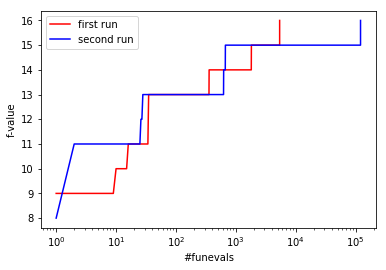

In [9]:
from matplotlib import pyplot as plt

plt.semilogx(range(1,firstRuntimePRS+1), firstFitnessPRS, 'r-', label='first run')
plt.semilogx(range(1,secondRuntimePRS+1), secondFitnessPRS, 'b-', label='second run')
plt.xlabel('#funevals')
plt.ylabel('f-value')
plt.legend()
plt.show()

In [10]:
n = range(2, 17)
numOfRuns = 11

runtimesPerDimensionPRS = []
for i in n:
    runtimesPRS = []
    for r in range(numOfRuns):
        runtimesPRS.append(pureRS(i)[0])
    runtimesPerDimensionPRS.append(runtimesPRS)

# make numpy array to better handle the data
runtimesPerDimensionPRS = np.array(runtimesPerDimensionPRS)
    

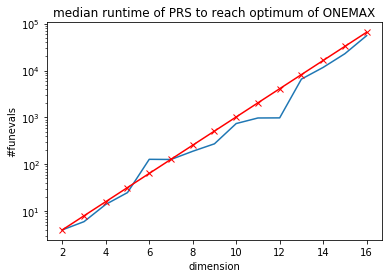

In [12]:
#plt.plot(n, np.median(runtimesPerDimensionPRS, axis=1))
plt.semilogy(n, np.median(runtimesPerDimensionPRS, axis=1))
plt.xlabel('dimension')
plt.ylabel('#funevals')
plt.semilogy(n, [2**i for i in n], 'rx-')
plt.title('median runtime of PRS to reach optimum of ONEMAX')
plt.show()

In [ ]:
plt.boxplot(runtimesPerDimensionPRS.transpose(), labels=n)
plt.xlabel('dimension')
plt.ylabel('#funevals')
plt.title('runtime of PRS to reach optimum of ONEMAX (%d runs)' % numOfRuns)
plt.show()

In [15]:
def oneplusoneEA(n):
    '''
       Returns the number of function evaluations
       until the optimal function value of the ONEMAX
       function with n bits is reached by the (1+1)EA.
       In addition, it returns a vector `fitness` of
       all bestsofar function values.
    '''
    x = np.random.randint(0,2,n) # n random values in {0,1}
    fx = onemax(x)    
    fevals = 1 # counter of function evaluations
    fitness = [fx] # store all best-so-far function values
    
    while fx < n:
        b = np.random.binomial(1, 1/n, size=n)
        y = abs(x - b)
        fy = onemax(y)
        fevals = fevals + 1
        if fy >= fx:
            x = y
            fx = fy

        fitness.append(fx)
        
    return (fevals, fitness)

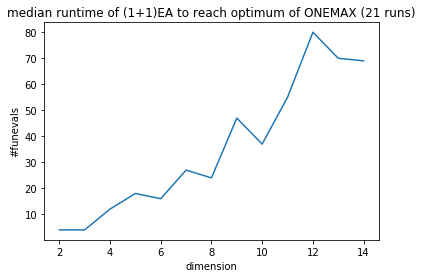

In [16]:
n = range(2, 15)
numOfRuns = 21

runtimesPerDimensionOnePlusOne = []
for i in n:
    runtimesOnePlusOne = []
    for r in range(numOfRuns):
        runtimesOnePlusOne.append(oneplusoneEA(i)[0])
    runtimesPerDimensionOnePlusOne.append(runtimesOnePlusOne)

# make numpy array to better handle the data
runtimesPerDimensionOnePlusOne = np.array(runtimesPerDimensionOnePlusOne)
    
plt.plot(n, np.median(runtimesPerDimensionOnePlusOne, axis=1))
plt.xlabel('dimension')
plt.ylabel('#funevals')
plt.title('median runtime of (1+1)EA to reach optimum of ONEMAX (%d runs)' % numOfRuns)
plt.show()

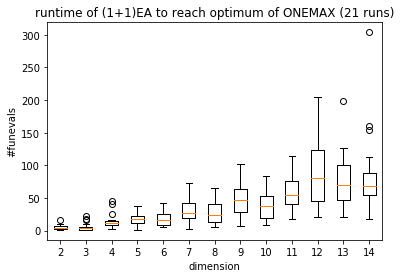

In [17]:
plt.boxplot(runtimesPerDimensionOnePlusOne.transpose(), labels=n)
plt.xlabel('dimension')
plt.ylabel('#funevals')
plt.title('runtime of (1+1)EA to reach optimum of ONEMAX (%d runs)' % numOfRuns)
plt.show()